\begin{abstract}

In this study, we present a semi-analytical approach to determine the
escape rate of a multi-component shotnoise process through a fixed
threshold. We show that this framework can be applied for both
additive (current-based) as well as multiplicative (conductance-based)
integration of stationary Poisson processes.

By providing a practical solution to this analytically-challenging
problem, our work opens the path toward the investigation of the
emergent dynamics in recurrent networks far from the diffusion
approximation.

\end{abstract}

# Introduction

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%% Figure with schematic of the problem (see code above)
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
\begin{figure}[b!]  \plot[width=.9\linewidth]{figures/illustr}
\caption{\label{fig:illustr} \textbf{Figure \ref{fig:illustr}. How do
presynaptic frequencies control output spiking ? Schematic of cellular
computation in the model considered here}.  Spiking events in
presynaptic neurons (top plot) evokes transient synaptic conductance
increases associated to synaptic reversal potentials thus producing
either excitatory or inhibitory currents (middle plot). Those currents
are integrated by the membrane to shape the membrane potential time
course (bottom plot) that upon crossing of the threshold trigger
action potentials (dashed line events).}  \end{figure}

Shotnoise processes have applications in a various fields [...]. In
the field of neurophysiology, a particularly relevant application is
the study of the escape process through a fixed boundary.  Indeed, the
time course of the membrane potential can be seen as a set of
functions summed over point processes (excitatory and inhibitory
pre-synaptic events convoluted with post-synaptic deflections) and the
emission of action potential can be seen as a positive crossing of the
spiking threshold. Derivations based on the analysis of shotnoise
processes can thus provide the input-output function of a single model
cell: a function that relates its presynaptic spiking activity into
the cell's spiking probability (or escape rate). This quantity lies at
the core of the analytical treatment of recurrent network dynamics
(the so-called \emph{mean-field} description of network dynamics)
which constitutes the foundations of our current theoretical
understanding of neural network activity.

A classical treatment of this question consists in
transforming the shotnoise process into a stochastic process (the
so-called \emph{diffusion approximation}). With this approach, the
problem is translated into a Fokker-Planck equation, that can be
solved analytically in some for some simple cases. Nonetheless this
approximation is only valid at high frequencies for the Poisson point
processes, i.e. in the presence of intense synaptic bombardment,
whereas neural network dynamics can display regimes where membrane
potential dynamics is dominated by few synaptic events
\citep{DeWeese2006}. Understanding network dynamics in such a sparse
activity regime will therefore only be achievable

the pro passage time through a boundary os a particular
application can be found

The first passage time through a given threshold is a tough
problem. One needs to determine the positive flux through the
threshold.

A recent study was able to obtain analytically the first passage time
by using Laplace transforms on the fluxes equations
\citep{Rich2010}. Nonetheless, the Laplace transform framework is only
applicable to the situation of synaptic weights distributed randomly
according to an exponential distribution. While

Also, in general, the fluxes equation are not easily amenable to
numerical solution \citep{Rich2007}.


In [1]:
"""
To run the code below, you will need:

1) a scientific python distribution, e.g. download the one from continuum analytics:
       https://www.continuum.io/downloads

2) one custom python module, install it from commend line by running:
       git clone https://bitbucket.org/yzerlaut/data_analysis

   N.B. this requires to have 'git' installed, 
        if you don't you can download the zipped folder from https://bitbucket.org/yzerlaut/data_analysis
"""
# for debugging the writing of modules, we use autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline
plt.style.use('ggplot') # a nice plotting style
from graphs.my_graph import * # some matplotlib tweaks
R, G, B = '#E24A33', '#8EBA42', 'r'

In [2]:
##########################################################
############# Running an example simulation  #############
##########################################################

from neural_network_dynamics.transfer_functions.single_cell_protocol import run_sim as single_cell_sim

params = {'N':1,\
          'Gl':10., 'Cm':200.,'Trefrac':.1,\
          'El':-70., 'Vthre':-50., 'Vreset':-70.}
SYN_POPS = [{'name':'exc1', 'Erev': 0.0, 'N': 2000, 'Q': 1., 'Tsyn': 3., 'pconn': 0.1},
            {'name':'exc2', 'Erev': 0.0, 'N': 2000, 'Q': 8., 'Tsyn': 3., 'pconn': 0.1},
            {'name':'inh1', 'Erev': -80.0, 'N': 500, 'Q': 10., 'Tsyn':3., 'pconn': 0.1},
            {'name':'inh2', 'Erev': -80.0, 'N': 500, 'Q': 20., 'Tsyn': 3., 'pconn': 0.1}]
RATES = [.5,.3,.9,.2]

data = single_cell_sim(params, SYN_POPS, RATES,
                       tstop=700., dt=0.1, with_Vm=1, SEED=8, with_synaptic_currents=True);

KeyError: 'prespikes'

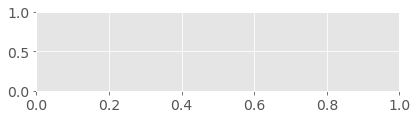

KeyError: 'prespikes'

In [3]:
R, G, B = '#E24A33', '#11875d', '#276ab3'
XTICKS = np.arange(4)*200
COLORS = [G, G, R, R]
fig, N1, N2 = plt.figure(figsize=(6,7)), 5, 1
plt.subplots_adjust(left=.15, bottom=.05, top=.96, right=.99)
# presynaptic raster
ax1 = plt.subplot2grid((N1, N2), (0, 0))
j = 0
for i, prespikes in enumerate(data['prespikes']):
    y = j+np.random.randint(SYN_POPS[i]['N'], size=len(prespikes))
    ax1.plot(prespikes, y, 'o', color=COLORS[i], ms=3)
    j += SYN_POPS[i]['N']
ax1.set_yticks([]);ax1.set_ylabel('presynaptic\n neurons')
# synaptic currents
ax2 = plt.subplot2grid((N1, N2), (1, 0), rowspan=2)
ax2.plot(np.arange(len(data['Vm'][0]))*dt, 1e-3*data['Ie'][0], lw=1, color=G)
ax2.plot(np.arange(len(data['Vm'][0]))*dt, 1e-3*data['Ii'][0], lw=1, color=R)
ax2.set_ylabel('synaptic\ncurrents (nA)')
# Vm and spikes
ax3 = plt.subplot2grid((N1, N2), (3, 0), rowspan=2)
ax3.plot(np.arange(len(data['Vm'][0]))*dt, data['Vm'][0], lw=1.5, color=B)
for t in data['tspikes']: ax3.plot([t,t], [params['Vthre'], params['Vthre']+5], ':', lw=2, color=B)
for label, func in zip(['time (ms)', '$V_m$ (mV)'], [ax3.set_xlabel, ax3.set_ylabel]): func(label) # labeling
ax3.set_yticks([-70,-60,-50])
ax1.set_xticks(XTICKS);ax1.set_xticklabels([])
ax2.set_xticks(XTICKS);ax2.set_xticklabels([])
ax3.set_xticks(XTICKS)
plt.savefig('figures/illustr.png', dpi=300)

\small

# Methods

## Membrane equation and synaptic input

We start from the membrane equation of a single compartment model:

\begin{equation}
\label{eq:membrane}
C_m \frac{dV}{dt} = g_L \, (E_L - V) + I_{syn}(V, t) 
\end{equation}

where $C_m$ is the membrane capacitance, the leak current is set by a
leak conductance $g_L$ and a reversal potential $E_L$.The time- and
voltage-dependent current $I_{syn}(V, t)$ that stimulate the neuron is
made of the sum of synaptic currents (indexed by $s$ and having a
reversal potential $E_s$):

\begin{equation}
\label{eq:syn-currents}
I_{syn}(V,t)= \sum_{s} (E_s - V) \sum_{ \{t_s\} } Q_s e^{-\frac{t-t_s}{\tau_s}} \mathcal{H}(t-t_s)
\end{equation}

where $\mathcal{H}$ is the Heaviside function. The set of events
$\{t_s\}$ are the set of presynaptic events arriving to the
neuron. Those events will be generated by stationary Poisson processes
of frequency $\nu_s$. This synaptic model is referred to as the
conductance-based exponential synapse, we limit our study to this
model but our approach ould easily generalizes to other choices of
synaptic waveforms (delta, alpha, etc..).

## Approximation for post-synaptic events

For the analytical description of the $V_m$ shotnoise process, we need
to have an expression for the post-synaptic deflection following the
presynpatic event. For multiplicative integration (conductance-based
synapses), Equation \ref{eq:membrane} does not have a solution in
terms of common functions (the solution involves integral of
exponential of exponential), so we will use an approximation of the
post-synaptic waveforms. We apply the strategy formulated in
\citet{Kuhn}.

We first derive an approximation of the mean membrane potential
$\mu_V$. It is taken as the the value that slf-consistently solve
Equation \ref{eq:membrane} in presence of the mean conductances (where
the mean conductance of the popuulation $j$ is given by $\mu_{Gj} =
\nu_j \tau_j Q_j$ for the exponential shotnoise of Equation
\ref{eq:syn-currents}), we obtain:

\begin{equation}
\label{eq:muV}
\mu_V = \frac{g_L E_L + \sum_j \mu_{Gj} E_j}{g_L + \sum_j \mu_{Gj}}
\end{equation}

To obtain the post-synaptic waveform following a conductance input
$\delta G_j (t)$ (i.e. of population $j$), we fix all synaptic
conductances to their mean (also the conductance $j$ is described by
the $\delta G_j (t)$ deflection around $\mu_{Gj}$), we obtain the
equation:

\begin{equation}
\label{eq:membrane-for-mean}
\begin{split}
C_m \frac{d V}{dt} = & \big( \mu_{Gj} + \delta G_j(t) \big) \, \cdot \, (E_j - V) \\
                     & + g_L \, (E_L - V) + \sum_{k \neq j} \mu_{Gj} (E_L - V)
\end{split}
\end{equation}

We now rewrite Equation \ref{eq:membrane} to describe variations
around this mean membrane potential value dur to the $\delta G_j$
input. Let $\delta V_j = V - \mu_V$, after discarding second order
term ($\delta G_j \cdot \delta V_j$), we obtain:

\begin{equation}
\label{eq:membrane}
\frac{d \delta V}{dt} - \frac{\delta G_j(t) \, (E_j - \mu_V) }{C_m} + \frac{1}{\tau_m} \delta V = 0
\end{equation}

where we have introduced the effective membrane time constant $\tau_m
= \frac{C_m}{g_L + \sum_i \mu_{Gj}}$.

In [4]:
# Let's solve this...
# we perform this with the module of python for symbolic computation 'sympy'
import sympy as sym
sym.init_printing()

muV, Ej = sym.symbols('mu_V, E_j')
t, Tm, Tj, Qj, Gl, Cm = sym.symbols('t, tau_m, tau_j, Q_j, g_L, C_m', positive=True)
# not that t is positive, this setting replaces the heaviside function !! (N.B. sympy also gives the solution with the heaviside)
V = sym.Function('\delta V_j')
from sympy.functions.special.delta_functions import Heaviside # step function
# building the differential equation:
diff_eq = sym.Derivative(V(t), t)+V(t)/Tm-Qj/Cm*(Ej-muV)*sym.exp(-t/Tj)
diff_eq

                                                     -t 
                                                     ───
                                                     τ_j
d                   \delta V_j(t)   Q_j⋅(E_j - μ_V)⋅ℯ   
──(\delta V_j(t)) + ───────────── - ────────────────────
dt                        τₘ                 Cₘ         

In [5]:
# solving the equation
sol = sym.simplify(sym.dsolve(diff_eq, V(t)))
sol

                ⎧                                 -t                       
                ⎪                                 ───                      
                ⎪       ⎛     Q_j⋅t⋅(E_j - μ_V)⎞   τₘ                      
                ⎪       ⎜C₁ + ─────────────────⎟⋅ℯ             for τₘ = τ_j
                ⎪       ⎝             Cₘ       ⎠                           
                ⎪                                                          
\delta V_j(t) = ⎨⎛                             t     t ⎞                   
                ⎪⎜                             ── - ───⎟  -t               
                ⎪⎜                             τₘ   τ_j⎟  ───              
                ⎪⎜     Q_j⋅τ_j⋅τₘ⋅(E_j - μ_V)⋅ℯ        ⎟   τₘ              
                ⎪⎜C₁ + ────────────────────────────────⎟⋅ℯ      otherwise  
                ⎪⎝              Cₘ⋅(τ_j - τₘ)          ⎠                   
                ⎩                                                          

In [6]:
# implementing the boundary conditions in the two cases
dV0 = sol.subs(t,0).args[1] # value at 0 with the C1 unknow
C11 = sym.solve(dV0.args[0][0], 'C1')[0] # solving C1 for Tm=Ts
C12 = sym.solve(dV0.args[1][0], 'C1')[0] # solving C1 for R

In [7]:
CC1 = sym.Piecewise((C11, sym.Eq(Tm, Tj)), (C12, True)) # piecewise condition
sol_wb = sym.simplify(sol.subs('C1', CC1))
sol_wb

                ⎧                               -t                            
                ⎪                               ───                           
                ⎪                                τₘ                           
                ⎪            Q_j⋅t⋅(E_j - μ_V)⋅ℯ                              
                ⎪            ──────────────────────               for τₘ = τ_j
                ⎪                      Cₘ                                     
\delta V_j(t) = ⎨                                                             
                ⎪                       ⎛ t⋅(τ_j - τₘ)    ⎞  -t               
                ⎪                       ⎜ ────────────    ⎟  ───              
                ⎪                       ⎜    τ_j⋅τₘ       ⎟   τₘ              
                ⎪Q_j⋅τ_j⋅τₘ⋅(E_j - μ_V)⋅⎝ℯ             - 1⎠⋅ℯ                 
                ⎪───────────────────────────────────────────────   otherwise  
                ⎩                 Cₘ⋅(τ_j - τₘ)     

In [6]:
# printing to write the solution on text
print(sym.latex(sol_wb))

\delta V_{j}{\left (t \right )} = \begin{cases} \frac{Q_{j} t}{C_{m} e^{\frac{t}{\tau_{m}}}} \left(E_{j} - \mu_{V}\right) & \text{for}\: \tau_{m} = \tau_{j} \\\frac{Q_{j} \tau_{j} \tau_{m}}{C_{m} \left(\tau_{j} - \tau_{m}\right) e^{\frac{t}{\tau_{m}}}} \left(E_{j} - \mu_{V}\right) \left(e^{\frac{t \left(\tau_{j} - \tau_{m}\right)}{\tau_{j} \tau_{m}}} - 1\right) & \text{otherwise} \end{cases}


For conductance events of the form considered here (exponential synapses, see Equation \ref{eq:syn-currents}):

\begin{equation}
\delta G_j(t) = Q_j e^{-\frac{t}{\tau_j}} \mathcal{H}(t)
\end{equation}

We obtain:
\begin{equation} \hspace{-.5cm}
\delta V_{j}{\left (t \right )} =
\begin{cases}
& \frac{ Q_{j} \left(E_{j} - \mu_{V} \right)
}{C_{m} } \, t \, e^{- \frac{t}{\tau_{m}}} \, \mathcal{H}(t) \qquad
\text{for}\: \tau_{m} = \tau_{j} \\ & \frac{Q_{j} \tau_{j} \tau_{m}
\left(E_{j} - \mu_{V}\right) }{C_{m} \left(\tau_{j} - \tau_{m}\right)}
\, e^{- \frac{t}{\tau_{m}}} \, \left(e^{\frac{t \left(\tau_{j} -
\tau_{m}\right)}{\tau_{j} \tau_{m}}} -1 \right) \, \mathcal{H}(t)
\end{cases} \end{equation}

## Properties of the membrane potential fluctuations

In this section, we provide the expression for the standard deviation,
skewness and global autocorrelation time of the membrane potential
fluctuations. They are derived by using Campbell's theorem (providing
the expression of the moment generating function for a shotnoise that
sums functions over a Poisson point process) and the independence
hypothesis across the different populations of the multi-component
stimulation. See details in the Appendix.

In [8]:
sol_wb.args[1] # right hand side of solution

⎧                               -t                            
⎪                               ───                           
⎪                                τₘ                           
⎪            Q_j⋅t⋅(E_j - μ_V)⋅ℯ                              
⎪            ──────────────────────               for τₘ = τ_j
⎪                      Cₘ                                     
⎨                                                             
⎪                       ⎛ t⋅(τ_j - τₘ)    ⎞  -t               
⎪                       ⎜ ────────────    ⎟  ───              
⎪                       ⎜    τ_j⋅τₘ       ⎟   τₘ              
⎪Q_j⋅τ_j⋅τₘ⋅(E_j - μ_V)⋅⎝ℯ             - 1⎠⋅ℯ                 
⎪───────────────────────────────────────────────   otherwise  
⎩                 Cₘ⋅(τ_j - τₘ)                               

In [9]:
# now focusing on Tm!=Tj for the integrals
PSP_ = sol_wb.args[1].args[1][0]
# but you can check that the same results holds for Tm=Ts by uncommenting:
# PSP = sol_wb.args[1].args[0][0]
PSP_

                       ⎛ t⋅(τ_j - τₘ)    ⎞  -t 
                       ⎜ ────────────    ⎟  ───
                       ⎜    τ_j⋅τₘ       ⎟   τₘ
Q_j⋅τ_j⋅τₘ⋅(E_j - μ_V)⋅⎝ℯ             - 1⎠⋅ℯ   
───────────────────────────────────────────────
                 Cₘ⋅(τ_j - τₘ)                 

In [10]:
# making the substition T=Ts*Tm/(Ts-Tm) to facilitate integration
from sympy.abc import T
PSP = Qj*T/Cm*sym.exp(-t/Tm)*(Ej-muV)*(sym.exp(t/T)-1)
PSP

                  ⎛ t    ⎞  -t 
                  ⎜ ─    ⎟  ───
                  ⎜ T    ⎟   τₘ
Q_j⋅T⋅(E_j - μ_V)⋅⎝ℯ  - 1⎠⋅ℯ   
───────────────────────────────
               Cₘ              

In [11]:
# let's check that those expression are indeed equivalent upon substituion
sym.simplify(PSP.subs(T, Tj*Tm/(Tj-Tm))-PSP_)

0

In [12]:
# psp integral
iPSP = sym.simplify(sym.integrate(PSP, (t, 0, sym.oo)).subs(T, Tj*Tm/(Tj-Tm))).args[0][0] # performing integration
iPSP

Q_j⋅τ_j⋅τₘ⋅(E_j - μ_V)
──────────────────────
          Cₘ          

In [13]:
# ------ square integral --------
# performing integration and simplification
iiPSP = sym.factor(sym.simplify(sym.integrate(PSP**2, (t, 0, sym.oo)).subs(T, Tj*Tm/(Tj-Tm))).args[0][0]) 
iiPSP

   2    2   2            2
Q_j ⋅τ_j ⋅τₘ ⋅(E_j - μ_V) 
──────────────────────────
         2                
     2⋅Cₘ ⋅(τ_j + τₘ)     

In [17]:
print(sym.latex(iiPSP))

\frac{Q_{j}^{2} \tau_{j}^{2} \tau_{m}^{2} \left(E_{j} - \mu_{V}\right)^{2}}{2 C_{m}^{2} \left(\tau_{j} + \tau_{m}\right)}


The standard deviation $\sigma_V$ is given by:

\begin{equation}
\label{eq:std}
\sigma_V = \sqrt{\mathbb{E}(V^2)- \big( \mathbb{E}(V) \big)^2 } =
\sqrt{\sum_{\forall j} \nu_j \,
\frac{Q_{j}^{2} \tau_{j}^{2} \tau_{m}^{2} \left(E_{j} - \mu_{V}\right)^{2}}{2 C_{m}^{2} \left(\tau_{j} + \tau_{m}\right)}}
\end{equation}

In [14]:
# ------ cubic integral --------
# performing integration and simplification
iiiPSP = sym.factor(sym.simplify(sym.integrate(PSP**3, (t, 0, sym.oo)).subs(T, Tj*Tm/(Tj-Tm))).args[0][0]) 
iiiPSP

       3    3   3            3 
  2⋅Q_j ⋅τ_j ⋅τₘ ⋅(E_j - μ_V)  
───────────────────────────────
    3                          
3⋅Cₘ ⋅(τ_j + 2⋅τₘ)⋅(2⋅τ_j + τₘ)

In [19]:
print(sym.latex(iiiPSP))

\frac{2 Q_{j}^{3} \tau_{j}^{3} \tau_{m}^{3} \left(E_{j} - \mu_{V}\right)^{3}}{3 C_{m}^{3} \left(\tau_{j} + 2 \tau_{m}\right) \left(2 \tau_{j} + \tau_{m}\right)}


The skewness $\gamma_V$ is given by:

\begin{equation}
\label{eq:Tv}
\gamma_V = \frac{\mathbb{E}\Big( (V-\mu_V)^3 \Big)}{\sigma_V^3} = \frac{1}{\sigma_V^3} \cdot
\sum_{\forall j} \frac{ \nu_j \cdot 2 Q_{j}^{3} \tau_{j}^{3} \tau_{m}^{3} \left(E_{j} - \mu_{V}\right)^{3}}{3 C_{m}^{3} \left(\tau_{j} + 2 \tau_{m}\right) \left(2 \tau_{j} + \tau_{m}\right)}
\end{equation}


In [15]:
# ------ fourth power integral --------
# performing integration and simplification
iiiiPSP = sym.factor(sym.simplify(sym.integrate(PSP**4, (t, 0, sym.oo)).subs(T, Tj*Tm/(Tj-Tm))).args[0][0]) 
iiiiPSP

            4    4   4            4       
       3⋅Q_j ⋅τ_j ⋅τₘ ⋅(E_j - μ_V)        
──────────────────────────────────────────
    4                                     
4⋅Cₘ ⋅(τ_j + τₘ)⋅(τ_j + 3⋅τₘ)⋅(3⋅τ_j + τₘ)

In [15]:
print(sym.latex(iiiiPSP))

\frac{3 Q_{j}^{4} \tau_{j}^{4} \tau_{m}^{4} \left(E_{j} - \mu_{V}\right)^{4}}{4 C_{m}^{4} \left(\tau_{j} + \tau_{m}\right) \left(\tau_{j} + 3 \tau_{m}\right) \left(3 \tau_{j} + \tau_{m}\right)}


In [0]:
### EXPRESSION OF KURTOSIS REMOVED ###
# The kurtosis $\kappa_V$ is given by:

# \begin{equation}
# \label{eq:Tv}
# \kappa_V = \frac{\mathbb{E}\Big( (V-\mu_V)^3 \Big)}{\sigma_V^3} = \frac{1}{\sigma_V^4} \cdot
# \sum_{\forall j} \frac{ \nu_j \cdot 3 Q_{j}^{4} \tau_{j}^{4} \tau_{m}^{4} \left(E_{j} - \mu_{V}\right)^{4}}{4 C_{m}^{4} \left(\tau_{j} + \tau_{m}\right) \left(\tau_{j} + 3 \tau_{m}\right) \left(3 \tau_{j} + \tau_{m}\right)}
# \end{equation}

In [20]:
A, f = sym.symbols('A, f', real=True)
from sympy.abc import x
PSP__ = A*(sym.exp(-x/Tm)-sym.exp(-x/Tj))
PSP__

  ⎛ -x     -x ⎞
  ⎜ ───    ───⎟
  ⎜  τₘ    τ_j⎟
A⋅⎝ℯ    - ℯ   ⎠

In [21]:
# let's check that those expression are indeed equivalent upon substituion
sym.simplify(PSP__.subs({A: Qj*Tj*Tm/Cm/(Tj-Tm)*(muV-Ej),x:t})-PSP_)

0

In [22]:
PSP_hat = sym.Function('PSP_hat')
PSP_hat = sym.factor(sym.simplify(sym.fourier_transform(PSP__*sym.Heaviside(x), x, f)))
PV = sym.factor(sym.simplify(PSP_hat*sym.conjugate(PSP_hat)))# power spectrum contrib
PV

            2           2           
           A ⋅(τ_j - τₘ)            
────────────────────────────────────
⎛   2  2    2    ⎞ ⎛   2  2   2    ⎞
⎝4⋅π ⋅f ⋅τ_j  + 1⎠⋅⎝4⋅π ⋅f ⋅τₘ  + 1⎠

In [23]:
# numerator, given by integral
Num = sym.factor(sym.simplify(sym.integrate(PV, (f, -sym.oo, sym.oo)).subs(A,Qj*Tj*Tm/Cm/(Tj-Tm)*(muV-Ej))))
Num

   2    2   2            2
Q_j ⋅τ_j ⋅τₘ ⋅(E_j - μ_V) 
──────────────────────────
         2                
     2⋅Cₘ ⋅(τ_j + τₘ)     

In [24]:
# denominator given by value at 0
Denom = sym.factor(sym.simplify(PV.subs(f, 0).subs(A,Qj*Tj*Tm/Cm/(Tj-Tm)*(muV-Ej))))
Denom

   2    2   2            2
Q_j ⋅τ_j ⋅τₘ ⋅(E_j - μ_V) 
──────────────────────────
             2            
           Cₘ             

In [21]:
print(sym.latex(Num))
print(sym.latex(Denom))

\frac{Q_{j}^{2} \tau_{j}^{2} \tau_{m}^{2} \left(E_{j} - \mu_{V}\right)^{2}}{2 C_{m}^{2} \left(\tau_{j} + \tau_{m}\right)}
\frac{Q_{j}^{2} \tau_{j}^{2}}{C_{m}^{2}} \tau_{m}^{2} \left(E_{j} - \mu_{V}\right)^{2}


The global autocorrelation time is given by:

\begin{equation}
\label{eq:tauV-def}
\tau_V = \frac{1}{2} \, \big( \frac{ \int_\mathbb{R} P_V(f) \, df }{ P_V(0)} \big)^{-1} =
\big( \frac{
    \sum_{\forall j}
       \frac{Q_{j}^{2} \tau_{j}^{2}\left(E_{j} - \mu_{V}\right)^{2}}{\tau_{j} + \tau_{m} }
}{ \sum_{\forall j}
Q_{j}^{2} \tau_{j}^{2} \left(E_{j} - \mu_{V}\right)^{2}
    } \big)^{-1}
\end{equation}

where $P_V(f)$ is the power spectrum of the $V_m$ fluctuations (see Appendix).

In [19]:
"""
Let's make numpy functions from those analytical results
"""
script = ''
for function, expression in zip(['F_iPSP', 'F_iiPSP', 'F_iiiPSP', 'F_iiiiPSP', 'F_numTv', 'F_denomTv'],
                                [iPSP, iiPSP, iiiPSP, iiiiPSP, Num, Denom]):
    script += function+' = lambda Q_j, tau_j, tau_m, E_j, mu_V, C_m: '+str(expression)+'\n'
# write this within a module file
script_file = open('functions/psp_integrals.py', 'w')
script_file.write(script)
script_file.close()

NameError: name 'Num' is not defined

## Membrane potential distribution


Given the mean, standard deviation and skewness of the $V_m$
distribution, we use the Edgeworth expansion of the

\begin{equation}
\label{eq:edgeworth}
\begin{split}
P(V) = & \frac{1}{\sqrt{2 \pi} \, \sigma} \, \exp\Big( -\frac{(V-\mu_V)^2}{2 \, \sigma_V^2} \Big) \\
       & \times \Big( 1+  \frac{\gamma_V}{3!} \big(\, (\frac{V-\mu_V}{\sigma_V})^3
                                                   - 3 \, ( \frac{V-\mu_V}{\sigma_V} ) \, \big) \Big)
\end{split}
\end{equation}

Note that this expression does not strictly satisfies the requirements
of a probability distribution (in particular, it can be negative).

In [0]:
# equation for the Fourth order edgeworth expansion
# & + \frac{\kappa_V}{4!} \cdot \big( 3 - 6 ( \frac{V-\mu_V}{\sigma_V} )^2 + ( \frac{V-\mu_V}{\sigma_V} )^4 \big) \Big)

## Escape rate


The escape rate of the multi-component shotnoise process will be
determined semi-analytically. We adapt here the procedure formulated
in \citet{Zrl2016} to describe the situations of both low and high
synaptic bombardment . We start from a rough estimate of the spiking
probability (adapted from \citet{Amit1997}) that gives the escape rate
through an hypothetical \emph{effective threshold} $V_{thre}^{eff}$
under the Gaussian approximation for the $V_m$ distribution:

\begin{equation}
\label{eq:Fout}
\nu_{out} = \frac{1}{2 \, \tau_V} \textnormal{Erfc} \Big( \frac{V_{thre}^{eff}-\mu_V}{\sigma_V} \Big)
\end{equation}

where $\textnormal{Erfc}$ is the comlementary error function.

We then need to determine the \emph{effective threshold}. We define 5
terms that will contribute to its value:

- the normalized mean $V_m$:

     $X_1=\frac{\mu_V-\mu_V^0}{\delta \mu_V^0}$

- the normalized standard deviation:
   
    $X_2=\frac{\sigma_V-\sigma_V^0}{\delta \sigma_V^0}$

- the normalized skewness:
    
    $X_3=\frac{\gamma_V-\gamma_V^0}{\delta \gamma_V^0}$

- the normalized autocorrelation time:
    
    $X_4=\frac{\tau_V-\tau_V^0}{\delta \tau_V^0}$

- the probability to be above the \emph{real} threshold given $P(V)$:
    
    $X_5= \int_{V_{thre}}^{\infty} P(V) dV$

In [26]:
# let's calculate the probability to be abovve threshold given the 
V, Vthre, sV, muV, gV = sym.symbols('V, V_thre, sigma_V, mu_V, gamma_V')
to_integrate = sym.exp(-x**2/2)*(1+gV/6*x**3-gV/2*x)
to_integrate

                        2 
                      -x  
⎛     3            ⎞  ────
⎜γ_V⋅x    γ_V⋅x    ⎟   2  
⎜────── - ───── + 1⎟⋅ℯ    
⎝  6        2      ⎠      

In [27]:
Primitive = sym.Function('Primitive')
Primitive = sym.simplify(sym.integrate(to_integrate, x)) # note the minus sign because we will need the 
Primitive

⎛                           2          ⎞    2 
⎜                          x           ⎟  -x  
⎜                          ──          ⎟  ────
⎜       2                  2     ⎛√2⋅x⎞⎟   2  
⎜- γ_V⋅x  + γ_V + 3⋅√2⋅√π⋅ℯ  ⋅erf⎜────⎟⎟⋅ℯ    
⎝                                ⎝ 2  ⎠⎠      
──────────────────────────────────────────────
                      6                       

In [37]:
Xthre = sym.symbols('X_thre')
Proba = sym.expand(sym.limit(Primitive, x, sym.oo)-Primitive.subs(x,Xthre))
Proba

                  2               2                               
            -Xₜₕᵣₑ          -Xₜₕᵣₑ                                
            ────────        ────────            ⎛√2⋅Xₜₕᵣₑ⎞        
     2         2               2       √2⋅√π⋅erf⎜────────⎟        
Xₜₕᵣₑ ⋅γ_V⋅ℯ           γ_V⋅ℯ                    ⎝   2    ⎠   √2⋅√π
──────────────────── - ───────────── - ─────────────────── + ─────
         6                   6                  2              2  

In [35]:
str(Proba).replace('pi','np.pi').replace('sqrt','np.sqrt').replace('exp','np.exp').replace('erf','sp_int.erf')

'X_thre**2*gamma_V*np.exp(-X_thre**2/2)/6 - gamma_V*np.exp(-X_thre**2/2)/6 - np.sqrt(2)*np.sqrt(np.pi)*sp_int.erf(np.sqrt(2)*X_thre/2)/2 + np.sqrt(2)*np.sqrt(np.pi)/2'

In [36]:
Proba = sym.expand(sym.limit(Primitive, x, sym.oo)-Primitive.subs(x,(Vthre-muV)/sV))
Proba

                  2       2                                    2       2      
            -Vₜₕᵣₑ    -μ_V    Vₜₕᵣₑ⋅μ_V                  -Vₜₕᵣₑ    -μ_V    Vₜₕ
            ────────  ──────  ─────────                  ────────  ──────  ───
                  2        2        2                          2        2     
     2       2⋅σ_V    2⋅σ_V      σ_V                      2⋅σ_V    2⋅σ_V      
Vₜₕᵣₑ ⋅γ_V⋅ℯ        ⋅ℯ      ⋅ℯ            Vₜₕᵣₑ⋅γ_V⋅μ_V⋅ℯ        ⋅ℯ      ⋅ℯ   
─────────────────────────────────────── - ────────────────────────────────────
                      2                                          2            
                 6⋅σ_V                                      3⋅σ_V             

                         2       2                          2       2         
ᵣₑ⋅μ_V             -Vₜₕᵣₑ    -μ_V    Vₜₕᵣₑ⋅μ_V        -Vₜₕᵣₑ    -μ_V    Vₜₕᵣₑ⋅
──────             ────────  ──────  ─────────        ────────  ──────  ──────
   2                     2        2        2       

In [139]:
print(sym.latex(Proba))

- \frac{1}{6} \left(\gamma_{V} - \frac{\gamma_{V}}{\sigma_{V}^{2}} \left(V_{thre} - \mu_{V}\right)^{2} + 3 \sqrt{2} \sqrt{\pi} e^{\frac{\left(V_{thre} - \mu_{V}\right)^{2}}{2 \sigma_{V}^{2}}} \operatorname{erf}{\left (\frac{\sqrt{2} \left(V_{thre} - \mu_{V}\right)}{2 \sigma_{V}} \right )}\right) e^{- \frac{\left(V_{thre} - \mu_{V}\right)^{2}}{2 \sigma_{V}^{2}}} + \frac{\sqrt{2} \sqrt{\pi}}{2}


From the expression of $P(V)$ (Equation \ref{eq:edgeworth}), we get:

\begin{equation}
\vspace{-.5cm}
\begin{split}
& X_5 =  \frac{\sqrt{2} \sqrt{\pi}}{2} - \frac{1}{6} \Big(\gamma_{V} - \frac{\gamma_{V}}{\sigma_{V}^{2}} \big(V_{thre} - \mu_{V}\big)^{2} \\ & + 3 \sqrt{2} \sqrt{\pi} e^{\frac{\big(V_{thre} - \mu_{V}\big)^{2}}{2 \sigma_{V}^{2}}} \operatorname{erf}{\big (\frac{\sqrt{2} \big(V_{thre} - \mu_{V}\big)}{2 \sigma_{V}} \big )} \big) e^{- \frac{\big(V_{thre} - \mu_{V}\Big)^{2}}{2 \sigma_{V}^{2}}}
\end{split}
\end{equation}


In [151]:
"""
Let's make a numpy function from this
need to replace exp and sqrt, .. with numpy prefix
"""
expression = str(Proba).replace('pi','np.pi').replace('sqrt','np.sqrt').replace('exp','np.exp').replace('erf','sp_int.erf')
script = '\n Proba_g_P = lambda mu_V, sigma_V, gamma_V, V_thre: '+str(expression)+'\n'
script_file = open('functions/probability.py', 'w')
script_file.write(script)
script_file.close()


The \emph{effective threshold} is now taken as a second-order
polynomial in the $\{X_i\}$ 5 dimensional space :

\begin{equation}
\label{eq:vthre-eff}
V_{thre}^{eff}(\{X_i\}) = p_0 + \sum_{i \in \{1...5\}} p_i \, X_i
+ \sum_{(i, j) \in \{1...5\}^2} p_{ij} \, X_i \cdot X_j
\end{equation}


In [17]:
# this is imlemented in a mmodule:
## UNCOMENT TO SEE THE CODE OF THE FUNCTIONS
# %pycat functions/Vm_statistics.py

In [18]:
## We now run a single example at various levels of predicted muV
## UNCOMENT TO SEE THE CODE OF THE FUNCTIONS
# %pycat single_cell/demo_various_muV_levels.py

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%% Figure Various MUV levels
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
\begin{figure*}
\plot[width=.9\linewidth]{figures/full_fig_various_muV}
\caption{\label{fig:various-muV} \textbf{Figure
\ref{fig:various-muV}. Membrane potential integration at various
spiking frequencies of the presynaptic neurons and at different levels
excitatory/inhibitory balance}.  From left to right the presynaptic
excitatory activity is increased: (i) $\nu_e$ = XX Hz, (ii) $\nu_e$ =
XX Hz, (iii) $\nu_e$ = XX Hz, (iv) $\nu_e$ = XX Hz. From top to
bottom, we use the analytical prediction to adjust the inhibitory
activity to increase the mean depolarization level is increased : (A) $\mu_V$ =
-65mV, (B) $\mu_V$ = -60mV, (C) $\mu_V$ = -55mV.}  \end{figure*}

\normalsize

# Results

## Rationale behind a semi-analytical approach

We propose here a semi-analytical solution to this problem. Similarly
to \citet{Zrl2016} we convert the presynaptic bombardment into a
stationary membrane potential distribution and we capture the . In
this study, we extend this framework to the case of non-gaussian
membrane potential distribution and . We also show that this procedure
covers a wide range of biophysical settings, from additive processes
(current-based) to multiplicative processes (conductance-based).

In [25]:
from sympy import integrate, oo, latex
PSP = symbols('PSP', function=True)
PSP = sol.args[1][0].subs('C1', 0)
# integrate(PSP.subs(Heaviside(t),1), (t, 0, oo))
print(latex(PSP))
PSP

NameError: name 'symbols' is not defined

\begin{thebibliography}{00}

\bibitem[Amit \& Brunel, 1997]{Amit1997} Amit, D. J., \& Brunel,
N. (1997). Model of global spontaneous activity and local structured
activity during delay periods in the cerebral cortex. Cerebral cortex,
7(3), 237-252.

\bibitem[Kuhn et al., 2004]{Kuhn} Kuhn, A., Aertsen, A., \&
Rotter, S. (2004). Neuronal integration of synaptic input in the
fluctuation-driven regime. Journal of Neuroscience, 24(10), 2345-2356.

\bibitem[Zerlaut et al., 2016]{Zrl2016} Zerlaut, Y., Tele\'nczuk, B.,
Deleuze, C., Bal, T., Ouanounou, G., and Destexhe,
A. (2016). Heterogeneous firing rate response of mouse layer V
pyramidal neurons in the fluctuation-driven regime. The Journal of
physiology, 594(13), 3791-3808.

\bibitem[Brigham \& Destexhe, 2015)]{marco} Brigham, M., \& Destexhe,
A. (2015). Nonstationary filtered shot-noise processes and
applications to neuronal membranes. Physical Review E, 91(6), 062102.

\bibitem[Richardson \& Swarbrick, 2010]{Rich2010} Richardson, M. J., \&
Swarbrick, R. (2010). Firing-rate response of a neuron receiving
excitatory and inhibitory synaptic shot noise. Physical review
letters, 105(17), 178102.

\bibitem[Richardson, 2007]{Rich2007} Richardson,
M. J. (2007). Firing-rate response of linear and nonlinear
integrate-and-fire neurons to modulated current-based and
conductance-based synaptic drive. Physical Review E, 76(2), 021919.

\bibitem[Daley \& Vere-Jones, 2007]{Daley2007} Daley, D. J., \&
Vere-Jones, D. (2007). An introduction to the theory of point
processes: volume II: general theory and structure. Springer Science \&
Business Media.

\bibitem[DeWeese \& Zador, 2006]{DeWeese2006} DeWeese, M. R., and Zador,
A. M. (2006). Non-Gaussian membrane potential dynamics imply sparse,
synchronous activity in auditory cortex. Journal of Neuroscience,
26(47), 12206-12218.

\end{thebibliography}

# Appendix

## General considerations

We describe the membrane potential time course as a multi-component
sum of Poisson point processes, i.e. it corresponds to the sum:

\begin{equation}
V(t) = \sum_{\forall j} \sum_{\{t^k_j\}} f_j(t-t^k_j)
\end{equation}

where the set of events $\{t^k_j\}$ is generated by an homogeneous
Poisson process of intensity $\nu_j$ and $f_j(t)$ is the waveform
with which each event is convoluted. The index $j$ refers to one
specific component of the process (e.g. one excitatory type). All
components are independent from each other.

Within the shotnoise framework, it is convenient to define the
moment-generating function of the process $V$.

\begin{equation}
M(x) = \mathbb{E}(e^{ \, x \cdot V(t)})
\end{equation}

where $\mathbb{E}$ denotes the expectation over realizations
(and/or time, this is equivalent under the stationarity
hypothesis considered here).

The statistical moments are then given by:

\begin{equation}
\label{eq:link-moments-gen-func}
\mathbb{E}(V^n) = \frac{d^n M}{dx^n}|_{x=0}
\end{equation}

By independence of the individual components, we can separate the
moment-generating function as a product, i.e.

\begin{equation}
M(x) = \prod_{\forall j} M_j(x)
\end{equation}

Our analytical treatment relies on applying Campbell's theorem. In its
stationary version, this theorem states that for a Poisson point
process of frequency $\nu_j$, its moment generating function $M_j$ has
the expression:

\begin{equation}
\label{eq:campbell}
M_j(x) = \exp\Big( \, \nu_j \, \int_\mathbb{R} (e^{ \, x \cdot f_j(t)} - 1) dt \Big)
\end{equation}

## Deriving the properties of the membrane potential fluctuations

### Mean

Given Equation \ref{eq:link-moments-gen-func}, we will need the first
derivative of $M$ to get the mean of the process $V$. Starting from
Campbell's theorem (Equation \ref{eq:campbell}) on an individual
component, we get:

\begin{equation}
\label{eq:deriv1}
\frac{d M_j}{dx}|_{x=0} = \nu_j \, \int_\mathbb{R} f_j(t) dt
\end{equation}

To get the first moment, we get back to Equation
\ref{eq:link-moments-gen-func}:

\begin{equation}
\begin{split}
\mathbb{E}(V) = & \frac{d M}{dx}|_{x=0} = \frac{d }{dx}\Big( \prod_{\forall j} M_j \Big)|_{x=0} \\
                & = \sum_{\forall j} \frac{d M_j}{dx}|_{x=0} \prod_{\forall k \neq j} M_k(0)
\end{split}
\end{equation}

Because $\forall k$, $M_k(x=0)$ = 1, it follows that the mean $\mu_V$,
is given by:

\begin{equation}
\label{eq:mean}
\mu_V = \sum_j \nu_j \, \int_\mathbb{R} f_j(t) \, dt
\end{equation}

### Standard deviation

We will now need the second derivative of $M$ to get the second moment
of the process $V$. Again, starting from Campbell's theorem (Equation
\ref{eq:campbell}), we get:

\begin{equation}
\label{eq:deriv2-1}
\frac{d^2 M_j}{dx^2}|_{x=0} = \nu_j \, \int_\mathbb{R} \big( f_j(t) \big)^2 dt +
\Big( \frac{d M_j}{dx}|_{x=0} \Big)^2
\end{equation}

To get the second moment, we get back to Equation
\ref{eq:link-moments-gen-func}:

\begin{equation}
\label{eq:2nd-moment-1}
\begin{split}
\mathbb{E}(V^2) = & \frac{d^2 M}{dx^2}|_{x=0} = \frac{d^2 }{dx^2}\Big( \prod_{\forall j} M_j \Big)|_{x=0} \\
                  & = \sum_{\forall j} \frac{d^2 M_j}{dx^2}|_{x=0} -
                   \sum_{\forall j} \Big( \frac{d M_j}{dx}|_{x=0} \Big)^2 + \big(\mathbb{E}(V) \big)^2
\end{split}
\end{equation}

We use the expression of the derivative of the individual component,
Equation \ref{eq:deriv2-1}, to get the the standard deviation:

\begin{equation}
\label{eq:std}
\sigma_V = \sqrt{\mathbb{E}(V^2)- \big( \mathbb{E}(V) \big)^2 } =
\sqrt{\sum_{\forall j} \nu_j \, \int_\mathbb{R} \big( f_j(t) \big)^2 dt}
\end{equation}

### Skewness

Repeating the procedure for the third moment, we get:

\begin{equation}
\label{eq:deriv3-1}
\begin{split}
\frac{d^3 M_j}{dx^3}|_{x=0} = & \nu_j \, \int_\mathbb{R} \big( f_j(t) \big)^3 dt + \\
& 3 \, \frac{d M_j}{dx}|_{x=0} \, \frac{d^2 M_j}{dx^2}|_{x=0} +
\Big( \frac{d M_j}{dx}|_{x=0} \Big)^3
\end{split}
\end{equation}

We get back to Equation \ref{eq:link-moments-gen-func} for the third
moment of $V$ and we use the same expansions than previously (Equation
\ref{eq:2nd-moment-1}):

\begin{equation}
\label{eq:3rd-moment-1}
\begin{split}
\mathbb{E}(V^3) = & \frac{d^2 M}{dx^3}|_{x=0} = \frac{d^3 }{dx^3}\Big( \prod_{\forall j} M_j \Big)|_{x=0} \\
                  = & \sum_{\forall j} \frac{d^3 M_j}{dx^3}|_{x=0}
                    - \sum_{\forall j} \big(\frac{d M_j}{dx}|_{x=0} \big)^3 \\
                    & + 3 \, \mathbb{E}(V) \, \mathbb{E}(V^2) - 2 \, \big( \mathbb{E}(V) \big)^3 \\
                    & - 3 \sum_{\forall j} \frac{d M_j}{dx}|_{x=0} \, \frac{d^2 M_j}{dx^2}|_{x=0}
\end{split}
\end{equation}

We reintroduce the expression of the individual components (Equation
\ref{eq:deriv3-1}) and we use the identity found in Equation
\ref{eq:2nd-moment-1}:

\begin{equation}
\label{eq:3rd-moment-2}
\begin{split}
\mathbb{E}(V^3) = & \sum_{\forall j} \nu_j \, \int_\mathbb{R} \big( f_j(t) \big)^3 dt 
                    + \sum_{\forall j} \Big( \frac{d M_j}{dx}|_{x=0} \Big)^3 \\
                    & + 3 \sum_{\forall j} \, \frac{d M_j}{dx}|_{x=0} \, \frac{d^2 M_j}{dx^2}|_{x=0} \\
                        & + 2 \, \mathbb{E}(V) \Big( \mathbb{E}(V^2) - \mathbb{E}(V)^2 \Big) +
                        \big( \mathbb{E}(V) \big)^3 \\
                     & \, - \sum_{\forall j} \big(\frac{d M_j}{dx}|_{x=0} \big)^3 
                    + \sum_{\forall j} \frac{d M_j}{dx}|_{x=0} \, \frac{d^2 M_j}{dx^2}|_{x=0} 
\end{split}
\end{equation}

We simplify to get:

\begin{equation}
\label{eq:3rd-moment-3}
\begin{split}
\mathbb{E}(V^3) = &  2 \, \mathbb{E}(V) \Big( \mathbb{E}(V^2) - \mathbb{E}(V)^2 \Big) +
                     \big( \mathbb{E}(V) \big)^3 \\
                   & + \sum_{\forall j} \nu_j \, \int_\mathbb{R} \big( f_j(t) \big)^3 dt 
\end{split}
\end{equation}

We thus can obtain the skewness through:

\begin{equation}
\label{eq:skew}
\gamma_V = \frac{\mathbb{E}\Big( (V-\mu_V)^3 \Big)}{\sigma_V^3} = \frac{1}{\sigma_V^3}
+ \sum_{\forall j} \nu_j \, \int_\mathbb{R} \big( f_j(t) \big)^3 dt
\end{equation}

### Autocorrelation time

We defined the global autocorrelation time as in \citet{Zrl2016}:

\begin{equation}
\label{eq:tauV-def}
\tau_V = \frac{1}{2} \, \big( \frac{ \int_\mathbb{R} P_V(f) \, df }{ P_V(0)} \big)^{-1}
\end{equation}

where $P_V(f)$ is the power spectrum of the $V_m$ fluctuations that
can be obtained from shotnoise theory \cite{Daley2007}, through:
\begin{equation}
P_V(f) = \sum_{\forall j} \nu_j \| \hat{f_j}(f)  \|^2
\end{equation}

Note that the relations presented in this paper rely on the following
convention for the Fourier transform:
$$
\hat{F}(f) = \int_{\mathbb{R}} F(t) \, e^{-2 i \pi f t} dt
$$
